In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models # add models to the list
from torchvision.utils import make_grid
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# from os import listdir
# from os.path import isfile, join
# import shutil

# for character in train_data.classes:
#     directory = f'../data/simpsons_test/{character}'
#     if not os.path.exists(directory):
#         os.makedirs(directory)

# onlyfiles = [f for f in listdir('../data/simpsons_test/kaggle_simpson_testset') if isfile(join('../data/simpsons_test/kaggle_simpson_testset', f))]

# for path in onlyfiles:
#     new_folder = path.split('.')[0]
#     new_folder = ''.join([i for i in new_folder if not i.isdigit()])[:-1]
#     new_dest = f'../data/simpsons_test/{new_folder}/{path}'
#     source = f'../data/simpsons_test/kaggle_simpson_testset/{path}'                              
#     shutil.move(source, new_dest)    

In [3]:
batch_size = 160

In [4]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0, 0, 0],
                         [1, 1, 1])
    ])

In [5]:
train_data = datasets.ImageFolder(os.path.join('../data/simpsons_train'), transform=transform)
test_data = datasets.ImageFolder(os.path.join('../data/simpsons_test'), transform=transform)

In [6]:
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

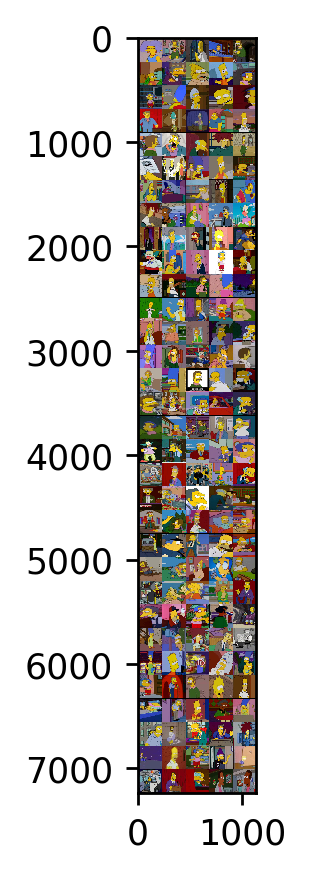

In [7]:
for images, labels in train_loader:
    break
    
images_grid = make_grid(images, nrow=5)

plt.figure(dpi=250)
plt.imshow(np.transpose(images_grid.numpy(), (1, 2, 0)));

In [8]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 5, 1)
        self.conv2 = nn.Conv2d(16, 32, 5, 1)
        self.fully_connected1 = nn.Linear(53*53*32, 240)
        self.fully_connected2 = nn.Linear(240, 120)
        self.fully_connected3 = nn.Linear(120, 42)
        
    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        
        X = X.view(-1, 53*53*32)
        X = F.relu(self.fully_connected1(X))
        X = F.relu(self.fully_connected2(X))        
        X = self.fully_connected3(X)
        
        return F.log_softmax(X, dim=1)

In [9]:
model = CNN()

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [11]:
epochs = 7

for epoch in range(epochs):
    batch = 0
    train_correct_predictions = 0
    train_losses = []
    for X_train, y_train in train_loader:
        batch += 1
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        
        y_pred = torch.max(y_pred,1)[1]
        train_correct_predictions += (y_pred==y_train).sum()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch%10 == 1:
            print(f'Learning batch {batch} of {len(train_loader)}')
        
    test_correct_predictions = 0
    test_losses = []
    with torch.no_grad():
        for X_test, y_test in test_loader:
            y_pred = model(X_test)
            loss = criterion(y_pred, y_test)
        
            test_losses.append(loss)
            y_pred = torch.max(y_pred,1)[1]
            test_correct_predictions += (y_pred==y_test).sum()
    

    print(f'\t Epoch {epoch+1} of {epochs} completed: \n \t\t train correct {train_correct_predictions.numpy()/20933*100}, \n \t\t test correct {test_correct_predictions.numpy()/990*100}, \n \t\t test loss {np.mean(test_losses)}')
    

Learning batch 1 of 131
Learning batch 11 of 131
Learning batch 21 of 131
Learning batch 31 of 131
Learning batch 41 of 131
Learning batch 51 of 131
Learning batch 61 of 131
Learning batch 71 of 131
Learning batch 81 of 131
Learning batch 91 of 131
Learning batch 101 of 131
Learning batch 111 of 131
Learning batch 121 of 131
Learning batch 131 of 131
	 Epoch 1 of 7 completed: 
 		 train correct 36.086561887928156, 
 		 test correct 52.92929292929293, 
 		 test loss 1.6607029438018799
Learning batch 1 of 131
Learning batch 11 of 131
Learning batch 21 of 131
Learning batch 31 of 131
Learning batch 41 of 131
Learning batch 51 of 131
Learning batch 61 of 131
Learning batch 71 of 131
Learning batch 81 of 131
Learning batch 91 of 131
Learning batch 101 of 131
Learning batch 111 of 131
Learning batch 121 of 131
Learning batch 131 of 131
	 Epoch 2 of 7 completed: 
 		 train correct 59.685663784455166, 
 		 test correct 74.54545454545455, 
 		 test loss 0.9920452237129211
Learning batch 1 of 13